In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread("./pics/lena_gray_256.tif")


In [6]:
def quantize(image, levels):
    # levels = number of gray levels (e.g., 2, 4, 8, 16, 32...)
    step = 256 // levels
    return ((image // step) * step).astype(np.uint8)

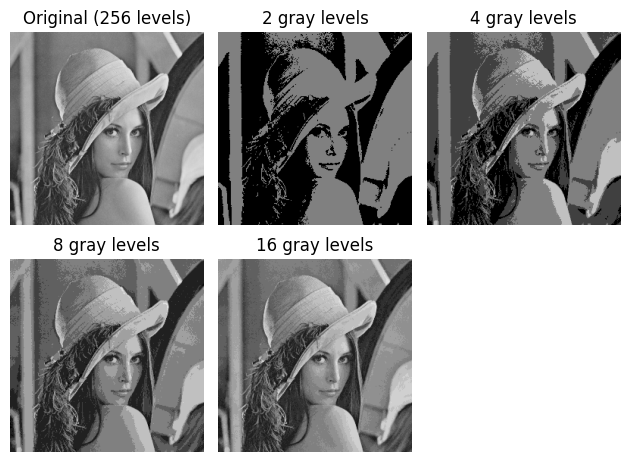

In [9]:
levels_list = [2, 4, 8, 16]   # examples of reduced quantization
plt.subplot(2, 3, 1)
plt.title("Original (256 levels)")
plt.imshow(img, cmap='gray')
plt.axis('off')
for i, L in enumerate(levels_list):
    q = quantize(img, L)
    plt.subplot(2, 3, i+2)
    plt.title(f"{L} gray levels")
    plt.imshow(q, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()



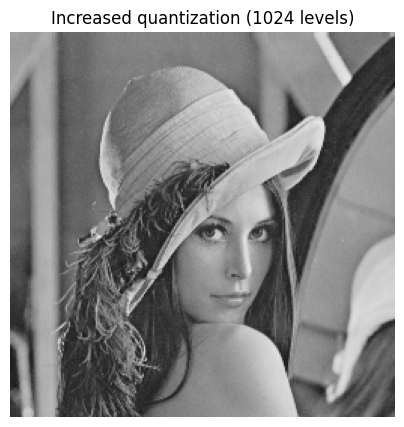

In [10]:
levels_high = 1024  # more than original 256 → smooth
img_float = img.astype(np.float32) / 255.0  # normalize
img_high = np.clip((img_float * (levels_high - 1)).round() / (levels_high - 1), 0, 1)

plt.figure(figsize=(5, 5))
plt.title("Increased quantization (1024 levels)")
plt.imshow(img_high, cmap='gray')
plt.axis('off')
plt.show()